## The first step is to create a bucket (the data lake) and a few folders (the data lake zones)

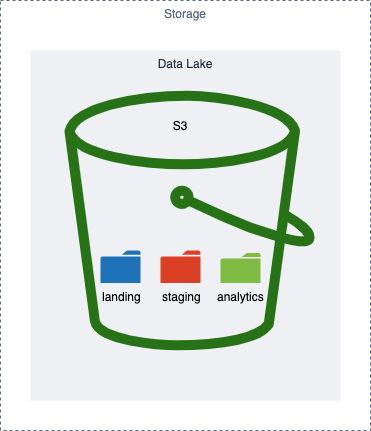

## 1) Install required packages

In [ ]:
!pip install pandas
!pip install pyarrow
!pip install s3fs
!pip install simplejson

## 2) Import packages

In [ ]:
import urllib.request
from zipfile import ZipFile
import pandas as pd
import os

## 3) Retrieve your account number and set a bucket name

In [ ]:
import simplejson
with open('/opt/ml/metadata/resource-metadata.json') as fh:
    metadata = simplejson.loads(fh.read())
accountid = metadata['ResourceArn'].split(':')[4]

%set_env accountid={accountid}
%set_env bucket_name=lab-{accountid}

## 4) Create your data lake bucket

In [ ]:
%%bash

#if [[ -z $(aws s3api head-bucket --bucket $bucket_name) ]]; then
#        echo "bucket exists. deleting bucket..."
#        aws s3 rb s3://$bucket_name --force 
#else
#        echo "bucket does not exist. creating bucket..."
#fi

aws s3 mb s3://$bucket_name --region us-east-2
aws s3 ls s3://$bucket_name/

## 5) Create your data lake folders

In [ ]:
%%bash
aws s3api put-object --bucket $bucket_name --key data/landing/
aws s3api put-object --bucket $bucket_name --key data/staging/
aws s3api put-object --bucket $bucket_name --key data/analytics/